## Question 1: Python Basics and Data Manipulation

In [1]:
# Import Python packages
import math
import os
import random
import re
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import stats

Load a given CSV file containing metal prices into a Pandas DataFrame.

In [2]:
data_file = "../data/MarketData.csv"
try:
    # Read in data set from the csv file, skip initial metadata rows (first 3 rows)
    f = open(data_file, 'rb')
    df = pd.read_csv(f, skiprows = 3, header = [0, 1, 2, 3])

    # Drop the first column name from the multi-index (for "Dates" column)
    df.columns = ['Dates'] + [f"{col[0]} ({col[1]})" for col in df.columns[1:]]
    
except:
    print('Error opening file/loading data')

In [3]:
# Convert "Dates" column to datetime format, European date format
df["Dates"] = pd.to_datetime(df["Dates"], dayfirst=True)

# Display the first few rows
df

,Dates,LME COPPER 3MO ($) (LMCADS03 Comdty),LME ALUMINUM 3MO ($) (LMAHDS03 Comdty),LME ZINC 3MO ($) (LMZSDS03 Comdty),LME LEAD 3MO ($) (LMPBDS03 Comdty),LME TIN 3MO ($) (LMSNDS03 Comdty),Generic 1st 'CL' Future (CL1 Comdty)
0,2010-01-01,7375.0,2230.0,2560.0,2432.0,16950,79.36
1,2010-01-04,7500.0,2267.0,2574.0,2515.0,17450,81.51
2,2010-01-05,7485.0,2302.0,2575.0,2522.5,17375,81.77
3,2010-01-06,7660.0,2377.0,2718.0,2680.0,17825,83.18
4,2010-01-07,7535.0,2310.0,2607.0,2599.0,17475,82.66
...,...,...,...,...,...,...,...
3386,2022-12-26,8349.5,2389.5,2965.0,2273.5,23934,79.56
3387,2022-12-27,8349.5,2389.5,2965.0,2273.5,23934,79.53
3388,2022-12-28,8443.0,2381.0,3005.5,2218.0,24734,78.96
3389,2022-12-29,8418.0,2405.0,2984.5,2272.5,24915,78.40


In [4]:
print(df.columns)

Index(['Dates', 'LME COPPER    3MO ($) (LMCADS03 Comdty)',
       'LME ALUMINUM  3MO ($) (LMAHDS03 Comdty)',
       'LME ZINC      3MO ($) (LMZSDS03 Comdty)',
       'LME LEAD      3MO ($) (LMPBDS03 Comdty)',
       'LME TIN       3MO ($) (LMSNDS03 Comdty)',
       'Generic 1st 'CL' Future (CL1 Comdty)'],
      dtype='object')


Filter the data to include only 'Copper' and 'Zinc' for the year 2021.

In [5]:
# First slice dataframe by "Dates", copper and zinc columns, then slice by the 2021 data
df_filtered = df[['Dates', 'LME COPPER    3MO ($) (LMCADS03 Comdty)', 'LME ZINC      3MO ($) (LMZSDS03 Comdty)']][df['Dates'].dt.year == 2021]
df_filtered

,Dates,LME COPPER 3MO ($) (LMCADS03 Comdty),LME ZINC 3MO ($) (LMZSDS03 Comdty)
2870,2021-01-01,7766.0,2751.0
2871,2021-01-04,7860.5,2792.0
2872,2021-01-05,8002.0,2813.0
2873,2021-01-06,8037.5,2860.0
2874,2021-01-07,8179.0,2888.0
...,...,...,...
3126,2021-12-27,9568.0,3519.0
3127,2021-12-28,9568.0,3519.0
3128,2021-12-29,9680.5,3513.0
3129,2021-12-30,9691.5,3532.5


Calculate the average price per month for each metal and plot it.

In [6]:
# Resample the data by month and calculate the mean price for all metals from initial data
df_monthly = df.set_index('Dates').resample('ME')[df.columns[1:]].mean()
df_monthly

,LME COPPER 3MO ($) (LMCADS03 Comdty),LME ALUMINUM 3MO ($) (LMAHDS03 Comdty),LME ZINC 3MO ($) (LMZSDS03 Comdty),LME LEAD 3MO ($) (LMPBDS03 Comdty),LME TIN 3MO ($) (LMSNDS03 Comdty),Generic 1st 'CL' Future (CL1 Comdty)
Dates,,,,,,
2010-01-31,7392.738095,2260.904762,2446.690476,2379.738095,17737.619048,78.429048
2010-02-28,6891.650000,2086.000000,2174.450000,2146.050000,16416.250000,76.336500
2010-03-31,7501.260870,2242.369565,2306.565217,2189.739130,17586.739130,81.290000
2010-04-30,7774.363636,2346.750000,2401.181818,2290.659091,18683.636364,84.588636
2010-05-31,6904.476190,2081.714286,2011.166667,1919.666667,17674.523810,74.110476
...,...,...,...,...,...,...
2022-08-31,7978.804348,2426.934783,3502.021739,2067.391304,24482.565217,91.482609
2022-09-30,7659.431818,2236.590909,3099.477273,1877.681818,21034.681818,83.941364
2022-10-31,7571.023810,2261.238095,2933.309524,1973.809524,19363.476190,87.030952


In [7]:
# Resample the data by month and calculate the mean price for copper and zinc for 2021
df_monthly_filtered = df_filtered.set_index('Dates').resample('ME')[['LME COPPER    3MO ($) (LMCADS03 Comdty)', 'LME ZINC      3MO ($) (LMZSDS03 Comdty)']].mean()
df_monthly_filtered

,LME COPPER 3MO ($) (LMCADS03 Comdty),LME ZINC 3MO ($) (LMZSDS03 Comdty)
Dates,,
2021-01-31,7968.690476,2730.023810
2021-02-28,8450.150000,2762.375000
2021-03-31,8974.586957,2809.369565
2021-04-30,9267.500000,2841.159091
2021-05-31,10162.357143,2982.571429
2021-06-30,9656.113636,2967.840909
2021-07-31,9480.204545,2962.318182
2021-08-31,9382.500000,2996.363636
2021-09-30,9327.636364,3048.750000


In [8]:
# Match column names to simple commodity names and colours
commodity_mapping = {
    'LME COPPER    3MO ($) (LMCADS03 Comdty)': ('Copper', 'orange'),
    'LME ALUMINUM  3MO ($) (LMAHDS03 Comdty)': ('Aluminum', 'blue'),
    'LME ZINC      3MO ($) (LMZSDS03 Comdty)': ('Zinc', 'green'),
    'LME LEAD      3MO ($) (LMPBDS03 Comdty)': ('Lead', 'red'),
    'LME TIN       3MO ($) (LMSNDS03 Comdty)': ('Tin', 'purple'),
    'Generic 1st \'CL\' Future (CL1 Comdty)': ('Crude Oil', 'brown')
}
commodity_mapping

{'LME COPPER    3MO ($) (LMCADS03 Comdty)': ('Copper', 'orange'),
 'LME ALUMINUM  3MO ($) (LMAHDS03 Comdty)': ('Aluminum', 'blue'),
 'LME ZINC      3MO ($) (LMZSDS03 Comdty)': ('Zinc', 'green'),
 'LME LEAD      3MO ($) (LMPBDS03 Comdty)': ('Lead', 'red'),
 'LME TIN       3MO ($) (LMSNDS03 Comdty)': ('Tin', 'purple'),
 "Generic 1st 'CL' Future (CL1 Comdty)": ('Crude Oil', 'brown')}

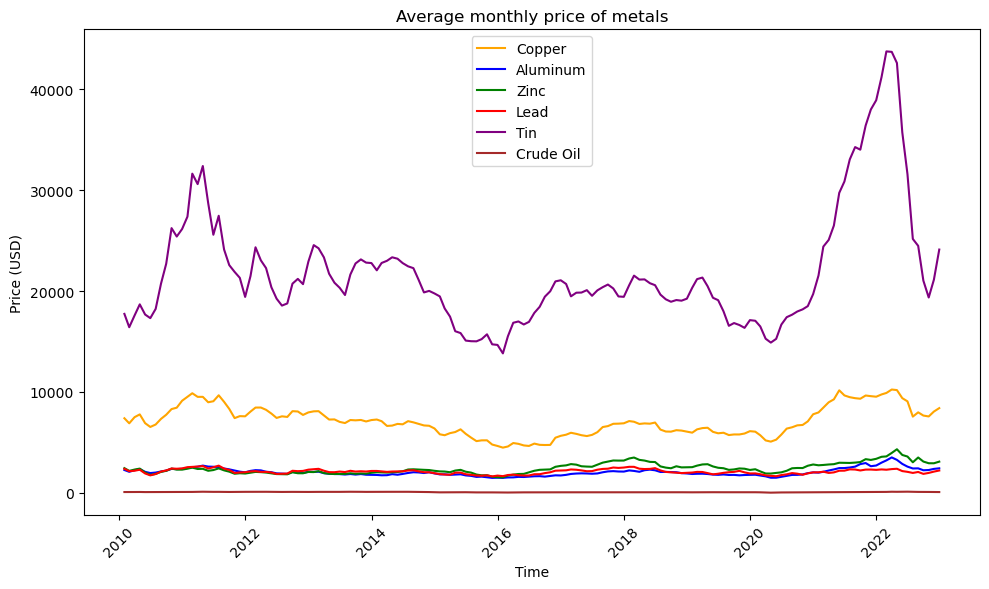

<Figure size 640x480 with 0 Axes>

In [9]:
# Define plot canvas
plt.figure(figsize=(10, 6))

# Plot the monthly average for all metals, all years
for comdty in commodity_mapping.keys():
    name, colour = commodity_mapping[comdty]
    plt.plot(df_monthly.index, df_monthly[comdty], label=name, color=colour)

# Add labels and title
plt.title('Average monthly price of metals')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()

# Save and show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_monthly_price.pdf')
plt.show()
plt.clf()

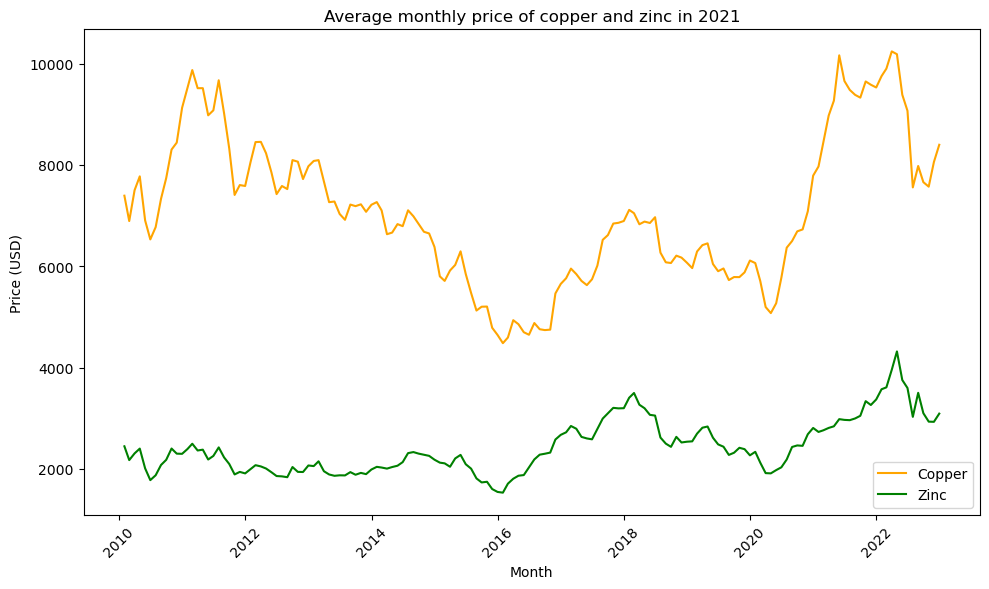

<Figure size 640x480 with 0 Axes>

In [10]:
# Define plot canvas
plt.figure(figsize=(10, 6))

# Plot the monthly average for copper and zinc, 2021
copper_zinc = ['LME COPPER    3MO ($) (LMCADS03 Comdty)', 'LME ZINC      3MO ($) (LMZSDS03 Comdty)']
for comdty in copper_zinc:
    name, colour = commodity_mapping[comdty]
    plt.plot(df_monthly.index, df_monthly[comdty], label=name, color=colour)

# Add labels and title
plt.title('Average monthly price of copper and zinc in 2021')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.legend()

# Save and show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_monthly_price_filtered.pdf')
plt.show()
plt.clf()

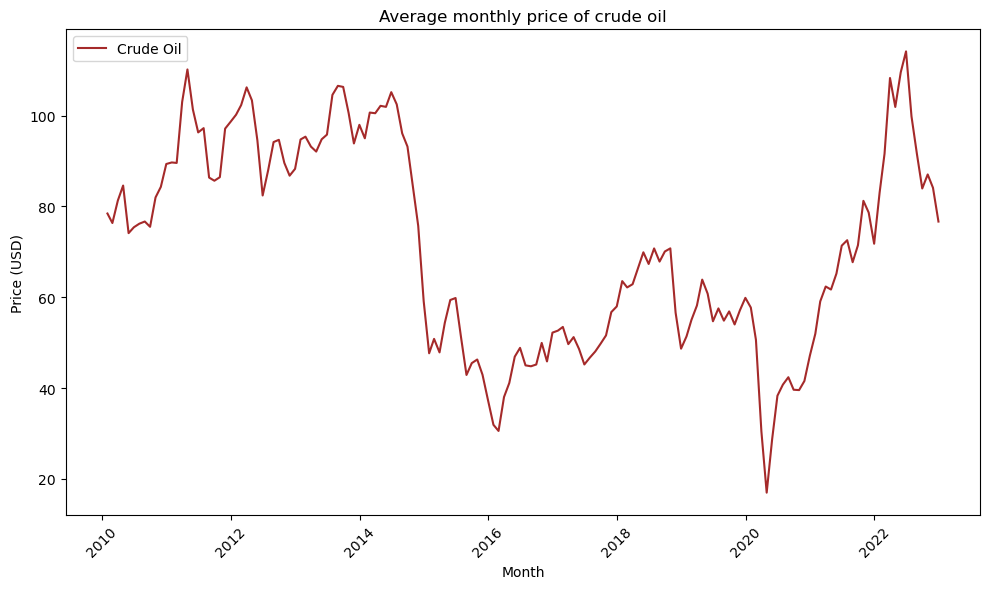

<Figure size 640x480 with 0 Axes>

In [11]:
# Out of interest, let's ceck the change in crude oil price
# Define plot canvas
plt.figure(figsize=(10, 6))

# Plot the monthly average for crude oil
name, colour = commodity_mapping['Generic 1st \'CL\' Future (CL1 Comdty)']
plt.plot(df_monthly.index, df_monthly['Generic 1st \'CL\' Future (CL1 Comdty)'], label=name, color=colour)

# Add labels and title
plt.title('Average monthly price of crude oil')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.legend()

# Save and show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_monthly_price_crude_oil.pdf')
plt.show()
plt.clf()